## Setup

In [62]:
####################
# Import libraries #
####################

import requests
import pandas as pd
import logging
from pandas import json_normalize
import matplotlib
import contextily
import geopandas as gpd
import matplotlib.pyplot as plt


In [ ]:

####################
# Load Data ########
####################

epl_url = 'https://ff4ed89e968c1d0d185d9e9b8fea990ba4d3cd6dc2842d7ede0d75e-apidata.googleusercontent.com/download/storage/v1/b/epl_players_data/o/epl_players_data_2024-04-30%2014:25:17.543472.csv?jk=ASOpP9iMsn6wrGfWThg7FP7ehuZ1bTLsUSHaw7dDTvP6UNriTK0qr6LXAGhn4Is0HqN_t8Vy5eczSV6-xqqM3mWrDF1JEnSFfmji3aPgeb0sTlDxEmTD0ILXZw0EIqd--kAlTeG_LPoRUlmbRGVzsGMSQxQlpafycGi1WFxgxnWhOrHhAuNvulXttMKFVo7cP0Fj0TTAKDD5ppgm00KGD7JJ_LSzFAbJ84532kIy79UWiOPh899cIqoWEzgfqEDXwEkjYIn-1M-6c36863rKsqXuWTF9rpGiob_q9gStYTA6Z7vmPgfU1yRw5i1PcYSPpwzvnCRt25uaDy3bIkiGEqu9cPYY7PVPVJwLj1UmhQyc4Kbh7eNt195UgxOXAQlzGVsvO1y6Ae9CpX4LfT7l1aPpyJ8moPUKsnsOworikRLJml5PBMBaXok-KHP9eEppCvyzPa9rEV_Ho7rp_3_AnVGABtadD4lHsUFz6WGdjTSuEjh8jsn0PKNWuSVs753zsnPfkIWShjmSKL2SAXwcwr6W2l3JPJ8oNOsZ-13_8DUww1A-KPtWPV3HoNG3jItxKYYhT6CdYdmVdF0kPJcdAtOfO3ocR3TnTwUKEF04qA01-qcsS7MIjhl8FXlAWh46wXWkzrYJi15E8lVI2LlsTnEgy0YdzOjFJPp3vHzLfWKo1QFyx03fnU4zHhhLI7yVJpkHn-viZR2ceFqmABaZoefx53xPGnOkNe6dwcYQiV17ml8T0bPvY8eSKjOo4PxoAlogdkKd9M-7KBwzT_bz91Fh90O5PHQAdGTQnSFpq2ZLFzvoVntEZD3Ee7VEJUy6GP9zCWphyQofZNWXsYKn-d6yVH7lED8kBTTwrGBXD8_0XAbD5g1pJiUagcvX_e1RCCeMMqgD4127DAOSoggK0_wXyo9w6UCutF2ZMt7OSdcy2_cJmFAd02Mo4bFli6bxJdhsKPOeUzsPnREOD1Ur-BWKKSIguTApIlF9Yto8KjNanuMUGdjc3r_yCTzEzrL7qMr56ChKu4-PjY20ECw2P4ljnw-kNT1PU4uuRyFt9DwaQUHFB4AkNyA6XUQDlb0NGOrQJ_o28DiVPe3ZuYGZrmM9W6WRT_BQRsRC8x-P9x9cqHuUXsn4uMfrg_9emv4-WItyqfP5k4vN4mBMHmEgC0jwu7UO05gl1Ji2v9x4Au9fosK65ZGchCyKwxaIcpcxDp1x5HGFx9EiHYPGi373_ERJAp0bXS0yJ19GV5k8kMVsP-b9qA&isca=1'
f1_url = 'https://ff61d6b642ae7072c0fe9294c6c52f5ca8ae18fe82a9435c141d7d7-apidata.googleusercontent.com/download/storage/v1/b/f1_driver_data/o/f1_driver_data_2024-04-30%2015:06:28.721922.csv?jk=ASOpP9iYlJBkHvMk6h4TPud49RghUzocbOqXYoTGrFVHJb0Aqa06y3utcKDRXyO7Ml1vzKmdwpb0iUAz9FFYY9kTGkFPfuMKsR7H-P037rKp96BqZuIy4pR-I0YxcPj3V_9Rhwi0q7ByHbMAdECGXbbpMb3LUBSKr-uA3CqhBTnDrKjwTCi9rEW1XNQQLxTXQyL4o2hPKkPJw2vbgauWxyAiUDPuhrbehAGRFZjQ-Wj0B3n8xEzFRaSVYv2PHQIrfsEjb3Wh6Iznpf1S9SK7KLM-mjJQmExsj_4cyqfRcJcTr_cgU8IuYiwNHUHbf9AtvUqnSCzuJXkcVQjWIr3sUs_C-K7Qf4PI5QZoLVjUHXonRyYYWmLhbYvDrNBB6r2tRjjGLLqlS62Xz29-CSpewmvmjv4MrV62V69AkV4RGnOd6hxgsy-oWn_njPc54YtnP-Pvmt0bzSgyS35PVWZzdyS1Teo-3MI1pYMSSvXIJML0EaHo7M4edHEIdbJjnIKm1JtUWx6krbVh2WqL8tFnJMD5_YnUSXb9nFoG68z2NT0P1WQIuXZoArZmBH7XdVzKil8y5o3SG8aHEdIVTxa6IlW8V6qpOjwVKmgHo7sH0FRluwR4UvniFIwov6MTKbYtOGWl4ud6imUtdkJP4z_2GucQ8M_UQaZlbjsJCTAQEL1s6GhD81mzq-wK9rXShDX2lloF4BYjiUHX88sSD2YNVY3pMPv5LmrSBZNokbmnnBlVdgi9PhmnsehQCfOkmg1dYmgCOYBovXwxGhCMPcdVjFjFz1Ljwzi0Q4hyhvIuiHVebMl8LEfxnapVr5TEMoP87VafHwYrsehYem2kxmxqxjEN0qX1ARD_nYLyuQlOKQU4hl4UsGcSGX4KjeMv_FsDcj3egUMTVeZe2-gJGdFBXMQ4HZHua0DeAhbg-_eCRjxkVy0ghw084NYVJD9JS-brneQi5lvX_nhlPNPUStShlB-yLqV7eYT85Rg7mXiogIGTxJA1KPS2Va3AhxT8VOUHo9HAc_HcgPkAOCf1dSTnKV7vSP2RMMqNcJNTxPXRkx5LlsKnNA3-8ee4R06RHXSPOaMIQHxDXgtuJyP-MX5xmGQRvo_HH1hv2cSUdDoZVMDuGiGVJXIqyqyAFANA6hqurBN8E64fEr5gSeRKwm0MLOjKrIx9omfU3Bmis8EdgDG3ecCU1ZwIxeLgFeiwx_mVgBJE1UZm_631ZaJoMM6bUzyKlLxD-2luAcTww3JI1q5N&isca=1'
countries_url = 'https://ff0e70251744f4da7b343029c00ea1906e060e998d85bff03d40867-apidata.googleusercontent.com/download/storage/v1/b/countries_code_data/o/countries_code_data_2024-04-30%2016:35:36.535473.csv?jk=ASOpP9jfDWL9Rk6egIEIC95OuLIIbCZt8SUgoVBNDDhcFI0k4zS1tgsXhlvHRweZLYxEZKgUnioHYKwiRqYEcPU5cHZwg_BH_RPydww-73kzEg73JstAcnVUsZBEnfuUp6N3cmUmhY3pKqEnpujVbB4oOD_fP72C2Od4z6hb6fELDZvHkdnY9zHNsbtscZCrBJlEIaAWd6HAKg2OT3eAXKkikSQRvO8iClhR6HZZ2_3h88_0-Xyrrsa1QFEqwNpbqRX13_MH9W3XKLFOHtpbCWIx1h4m7FU2Z_J0PuNdnX8uh5BNDnPvFL1dIoUWRG98diANdB4Iu2D9ykzmOlFeLeDt3P9J04nRYCJf1OXTVkwxoSS2-ja7jCn9MaVQtATfiCpgvAuwLkJ9MTpm_vcAcF9ViYcdbgap3vOVd-MLCQdJEMAqAr3N0718rcgU3OI7nTNIUkDjtQWRsJ4K3CoLhY9_ASPjDs0KnqzDWAACTNuHG9TfbMKGpZT0zkhaPuNE6RXxWA-X-L4qBTNTsJyT_JlRjU4vnHXVq6vRkI2V0SVlkxxawz_guGQnqv4Iw9A_T_-5ttP2XrykT1kYJihnTbBPOLBPoLvIO0-gqQaF1DRJnq23McmFOd0A-Z1xZKiRLwNAWgS4925_N2SjrHQR6raC9vXbcz858hbUX2kaWESEKb2vbQgJkCoNalCetxWLOjI36MRl9YHif5Ts089zsG8PmLb9AjHazHbuBh40YEmpUbSmeIycK8Y7gAN41k3flTx5l1Hn9rXzI0OzmwkvaP3yngfW-rRCp1uV-2UnrXogDfZ9n-_AiAbfLZv8pGvE2HIAKiXqAbUn1SwB_KLycQVAr3kt0tRrW58c3Q1KaWiijYM5u7XAJ57EBodoNb9TdJyu87KznpmJ0BQq69PTZ9GymhwzaiSwlmKxJxrf3TSFC5P6ECg69CvBTLPfbuT8gaVkR3ai4DnA3tRsYMx2qYnkRSWbYC3vcAuM0vCEKpMJBdvmUyOFXKqMmDL-GCxfKuawnhMmwMElkJeeHeq-tE-TL6vW59ZLrXQy0vir4XH6ODdznu5T_-XQfYndu8tNNF5Y1CbAyBaYc8dm3IAfzboND23CKMn6pQo47PL-mSdPy29DhsSuqHVGddYPzxVGKQDrF02qGuC6YzPgHNqj1F7fvhYqIYlsNjNKDJR_AgbFPpToq4fDzIR0wr5iaD-N4_LR-BJuktc9zlF_Sw2dEsha9x9EZj41Yfd1a6La1ZpcbrggI4-sWRjS_A&isca=1'

epl = pd.read_csv(epl_url)
f1 = pd.read_csv(f1_url)
countries = pd.read_csv(countries_url)


## View dataframes

In [34]:
epl

,id,team_id,common_name,firstname,lastname,display_name,date_of_birth,country_id
0,54191,78,I. dos Santos de Paulo,Igor Julio,dos Santos de Paulo,Igor,1998-02-07,5
1,24655,78,J. Veltman,Joël,Veltman,Joël Veltman,1992-01-15,38
2,9308200,78,T. Lamptey,Tariq,Lamptey,Tariq Lamptey,2000-09-30,462
3,6504,78,A. Webster,Adam,Webster,Adam Webster,1995-01-04,462
4,2423,78,S. March,Solomon,March,Solomon March,1994-07-20,462
...,...,...,...,...,...,...,...,...
549,62279,27,M. Benson Hedilazio,Manuel,Benson Hedilazio,Benson Manuel,1997-03-28,556
550,581094,27,D. O'Shea,Dara,O'Shea,Dara O'Shea,1999-03-04,455
551,9372,27,L. Vigouroux,Lawrence,Vigouroux,Lawrence Vigouroux,1993-11-19,462
552,3861826,27,L. Beyer,Louis Jordan,Beyer,Jordan Beyer,2000-05-19,11


In [ ]:

f1

In [51]:
countries = countries.rename(columns={'id': 'country_id'})
countries = countries.rename(columns={'iso3': 'country_code'})


## Process Data

In [58]:
# Get country name and code attached to epl players
epl_countries = epl.merge(
    countries,
    how='left',
    on='country_id'
)

# Keep only three needed columns
selected_columns = ['name', 'country_code']
epl_countries = epl_countries[selected_columns]

 # Group by country and count the number of players, then calculate percentages
epl_country_summary = epl_countries.groupby(['name', 'country_code']) \
        .size() \
        .reset_index(name='pl_players_count') \
        .sort_values('pl_players_count', ascending=False)

# Calculate the total number of players
total_players = epl_country_summary['pl_players_count'].sum()

# Calculate the percentage of players from each country
epl_country_summary['pl_players_count'].sum()
epl_country_summary['pl_players_pct'] = (epl_country_summary['pl_players_count'] / total_players * 100).round(2)

# Calculate F1 Driver Summary
f1_driver_country_summary = f1.groupby('country_code') \
    .size() \
    .reset_index(name='f1_driver_count') \
    .sort_values('f1_driver_count', ascending=False) \
    .reset_index(drop=True)

total_f1_drivers = f1_driver_country_summary['f1_driver_count'].sum()
f1_driver_country_summary['f1_driver_pct'] = (f1_driver_country_summary['f1_driver_count'] / total_f1_drivers * 100).round(2)

epl_f1_country_summary = epl_country_summary.merge(f1_driver_country_summary, how='left', left_on='country_code', right_on='country_code')

epl_f1_country_summary

,name,country_code,pl_players_count,pl_players_pct,f1_driver_count,f1_driver_pct
0,England,GBR,222,40.07,3.0,17.65
1,France,FRA,35,6.32,2.0,11.76
2,Brazil,BRA,33,5.96,NaN,NaN
3,Portugal,PRT,18,3.25,NaN,NaN
4,Netherlands,NLD,17,3.07,NaN,NaN
...,...,...,...,...,...,...
61,DR Congo,COD,1,0.18,NaN,NaN
62,Curaçao,CUW,1,0.18,NaN,NaN
63,Canada,CAN,1,0.18,NaN,NaN
64,Australia,AUS,1,0.18,1.0,5.88


## Visualize

/var/folders/br/qls568k95t971w84my6pxx1c0000gn/T/ipykernel_10435/2824225160.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


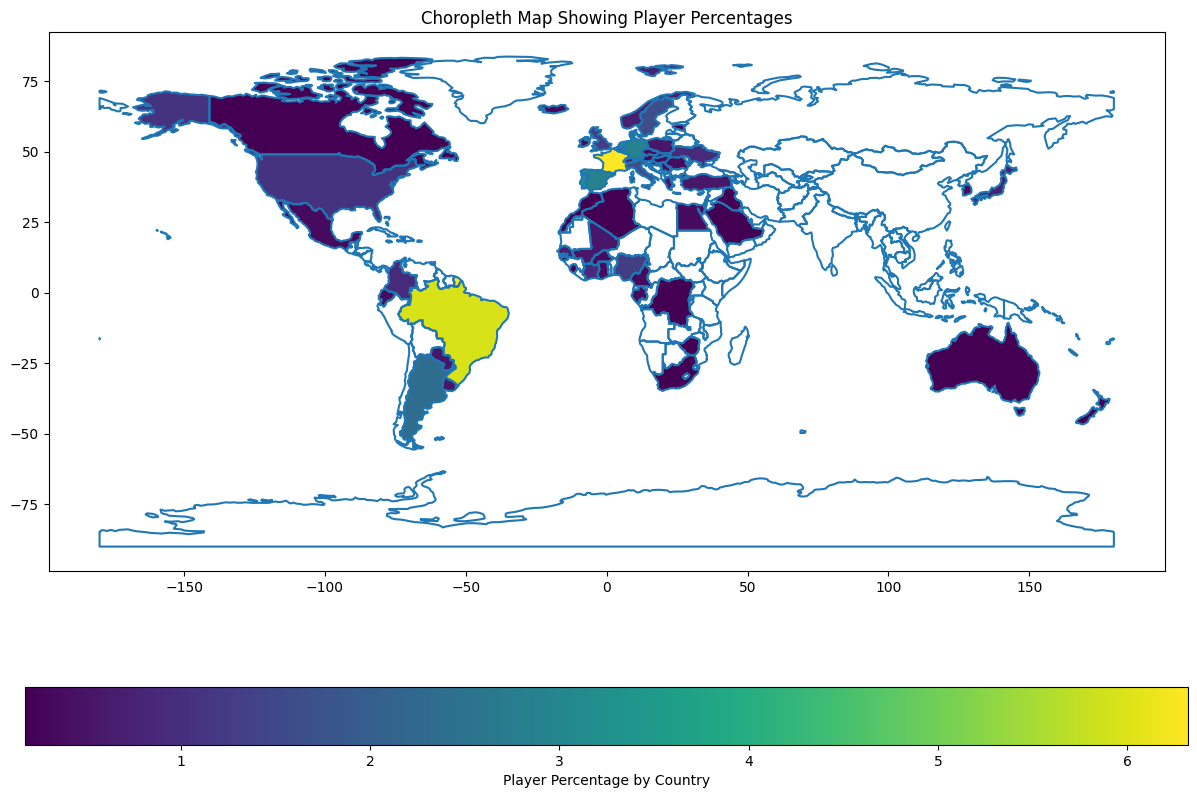

In [66]:
 # Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Ensure the country code in world and df are of the same type
world['iso_a3'] = world['iso_a3'].astype(str)
epl_f1_country_summary['country_code'] = epl_f1_country_summary['country_code'].astype(str)

# Filter out England from compare_df
compare_df_no_england = epl_f1_country_summary[epl_f1_country_summary['name'] != 'England']

# Merge the world map with your data
merged = world.merge(compare_df_no_england, left_on='iso_a3', right_on='country_code', how='left')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.boundary.plot(ax=ax)
merged.plot(column='pl_players_pct', ax=ax, legend=True,
            legend_kwds={'label': "Player Percentage by Country",
                            'orientation': "horizontal"})
plt.title('Choropleth Map Showing Player Percentages')
plt.show()


/var/folders/br/qls568k95t971w84my6pxx1c0000gn/T/ipykernel_10435/2214828155.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/opt/homebrew/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


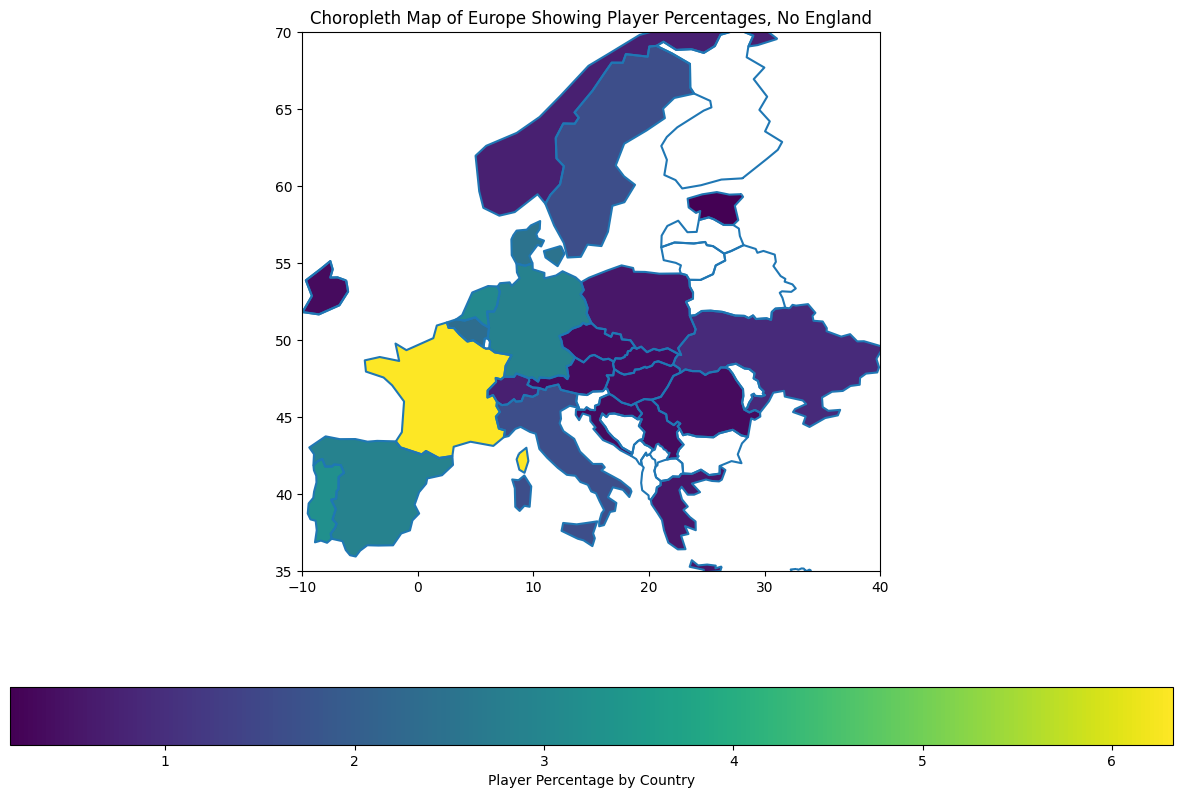

In [68]:


 # Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

european_countries = [
'ALB', 'AND', 'AUT', 'BLR', 'BEL', 'BIH', 'BGR', 'HRV', 'CYP', 'CZE',
'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ITA',
'XKX', 'LVA', 'LIE', 'LTU', 'LUX', 'MLT', 'MDA', 'MCO', 'MNE', 'NLD',
'MKD', 'NOR', 'POL', 'PRT', 'ROU', 'SMR', 'SRB', 'SVK', 'SVN',
'ESP', 'SWE', 'CHE', 'UKR', 'VAT'
]

# Filter for only European countries
europe = world[world['iso_a3'].isin(european_countries)]

# Ensure the country code in europe and compare_df are of the same type
europe['iso_a3'] = europe['iso_a3'].astype(str)
epl_f1_country_summary['country_code'] = epl_f1_country_summary['country_code'].astype(str)

# Filter out England from compare_df if still needed
compare_df = epl_f1_country_summary[epl_f1_country_summary['name'] != 'England']

# Merge the European map with your data
merged = europe.merge(compare_df, left_on='iso_a3', right_on='country_code', how='left')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.set_xlim(-10, 40)  # Adjust these limits to better fit the visualization you need
ax.set_ylim(35, 70)
merged.boundary.plot(ax=ax)
merged.plot(column='pl_players_pct', ax=ax, legend=True,
            legend_kwds={'label': "Player Percentage by Country",
                            'orientation': "horizontal"})
plt.title('Choropleth Map of Europe Showing Player Percentages, No England')
plt.show()

/var/folders/br/qls568k95t971w84my6pxx1c0000gn/T/ipykernel_10435/1169203737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['name'] = filtered_df['name'].replace('United States', 'United\nStates')


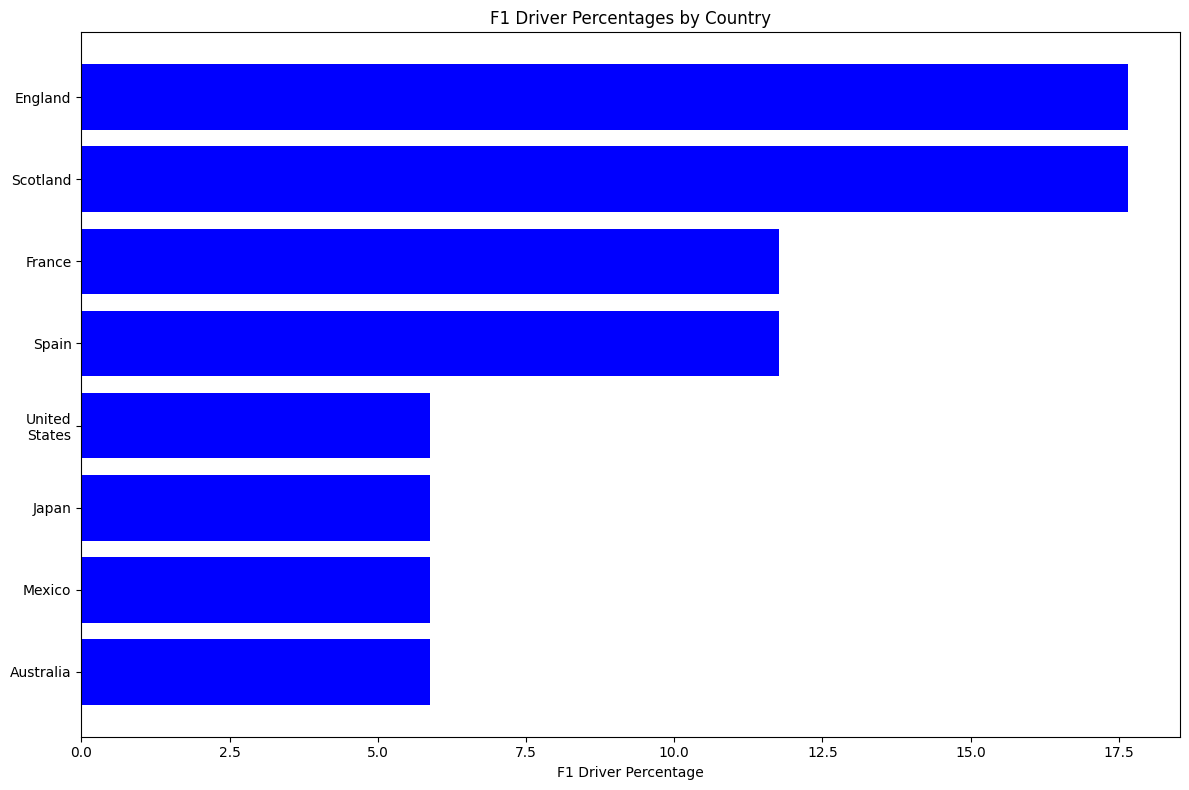

In [69]:
filtered_df = epl_f1_country_summary.dropna(subset=['f1_driver_pct'])

filtered_df['name'] = filtered_df['name'].replace('United States', 'United\nStates')

# Step 2: Sort the DataFrame by 'f1_driver_pct' in descending order
sorted_df = filtered_df.sort_values(by='f1_driver_pct', ascending=False)

# Step 3: Plotting a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(sorted_df['name'], sorted_df['f1_driver_pct'], color='b')
plt.xlabel('F1 Driver Percentage')
plt.title('F1 Driver Percentages by Country')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest percentage at the top
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()
